
## **Analysing Traffic Congestion Data to Improve Urban Mobility** 
## _SDG 11: Sustainable Cities and Communities_
### _Project Overview_
This project aims to analyze traffic congestion data on Interstate 94 Westbound to understand the factors affecting traffic volume. 
By leveraging this data, we aim to provide insights and recommendations for improving urban mobility in line with Sustainable 
Development Goal (SDG) 11: Sustainable Cities and Communities.

### _Dataset Overview_

Source: MN DoT ATR station 301, roughly midway between Minneapolis and St Paul, MN.
https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume

Attributes:
holiday: US National holidays plus regional holiday, Minnesota State Fair.

temp: Average temp in Kelvin.

rain_1h: Amount in mm of rain that occurred in the hour.

snow_1h: Amount in mm of snow that occurred in the hour.

clouds_all: Percentage of cloud cover.

weather_main: Short textual description of the current weather.

weather_description: Longer textual description of the current weather.

date_time: Hour of the data collected in local CST time.

traffic_volume: Hourly I-94 ATR 301 reported westbound traffic volume.


### _**1. Data Collection**_
#### Steps
1. Load the dataset into a pandas DataFrame.

2. Display the first few rows to understand the structure.


In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('/Users/sujayshah/Desktop/EDA PROJECT/Metro_Interstate_Traffic_Volume.csv')

# Display the first few rows of the dataset
df.head()


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


### _**2. Data Cleaning and Preprocessing**_
#### Steps
1. Handle Missing Values: Since the dataset has no missing values, this step can be skipped.

2. Handle Outliers: Identify and handle any outliers in the dataset.

3. Standardize Data Formats: Ensure all data types are appropriate (e.g., date_time as datetime).

4. Integrate Datasets: If additional datasets are used, integrate them appropriately.

In [2]:
# Data Preprocessing
# Handle missing values
df.fillna(method='ffill', inplace=True)

# Convert date_time to datetime object
df['date_time'] = pd.to_datetime(df['date_time'])

# Extract additional features from date_time
df['hour'] = df['date_time'].dt.hour
df['day_of_week'] = df['date_time'].dt.dayofweek
df['month'] = df['date_time'].dt.month

# Display the updated DataFrame
df.head()


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour,day_of_week,month
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,9,1,10
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10,1,10
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,11,1,10
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,12,1,10
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,13,1,10


### _**3. Exploratory Data Analysis (EDA)**_

#### - Descriptive Statistical Analysis

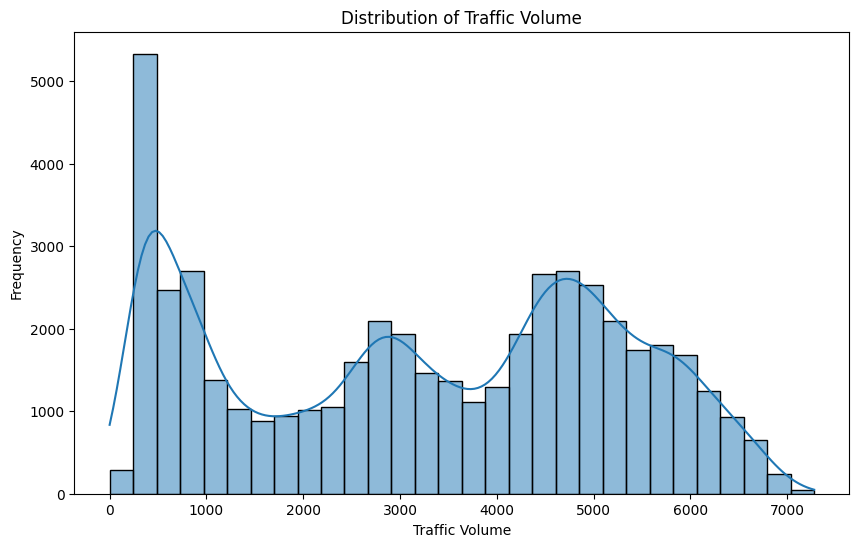

In [3]:
# Exploratory Data Analysis
# Descriptive Statistics
df.describe()

# Data Visualization
plt.figure(figsize=(10, 6))
sns.histplot(df['traffic_volume'], bins=30, kde=True)
plt.title('Distribution of Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.show()


### - **Feature Extraction and Additional Analysis**


In [4]:
# Copying data to a new DataFrame
df_traffic_features = df.copy()

# Extracting features from date_time variable
df_traffic_features['date_time'] = pd.to_datetime(df_traffic_features['date_time'])
df_traffic_features['weekday'] = df_traffic_features['date_time'].dt.weekday
df_traffic_features['date'] = df_traffic_features['date_time'].dt.date
df_traffic_features['hour'] = df_traffic_features['date_time'].dt.hour
df_traffic_features['month'] = df_traffic_features['date_time'].dt.month
df_traffic_features['year'] = df_traffic_features['date_time'].dt.year

# Categorizing hours into different time periods
def hour_modify(x):
    Early_Morning = [4, 5, 6, 7]
    Morning = [8, 9, 10, 11]
    Afternoon = [12, 13, 14, 15]
    Evening = [16, 17, 18, 19]
    Night = [20, 21, 22, 23]
    Late_Night = [24, 1, 2, 3]
    if x in Early_Morning:
        return 'Early_Morning'
    elif x in Morning:
        return 'Morning'
    elif x in Afternoon:
        return 'Afternoon'
    elif x in Evening:
        return 'Evening'
    elif x in Night:
        return 'Night'
    else:
        return 'Late_Night'
    
df_traffic_features['hour'] = df_traffic_features['hour'].map(hour_modify)



##### - **Traffic Volume by Hour of the Day:**
Purpose: To analyze how traffic volume varies by hour, identifying peak and off-peak hours.
Details: Shows the distribution of traffic volumes for each hour of the day.
##### - **Traffic Volume by Day of the Week:**
Purpose: To understand traffic volume patterns based on the day of the week.
Details: Shows how traffic volume differs across days of the week.


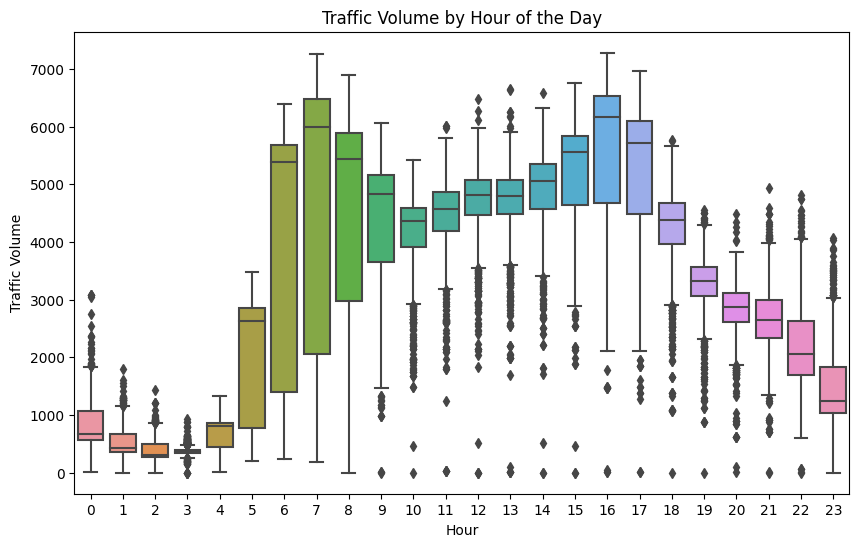

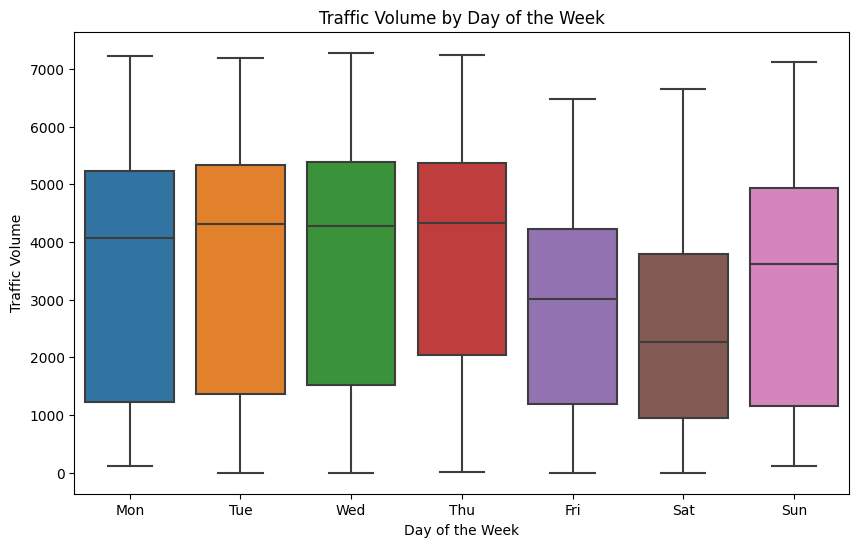

In [5]:
# Ensure that 'hour' and 'day_of_week' columns are extracted from 'date_time'
df['date_time'] = pd.to_datetime(df['date_time'])
df['hour'] = df['date_time'].dt.hour
df['day_of_week'] = df['date_time'].dt.day_name()

# Convert categorical columns to numeric if necessary
df['weather_main'] = df['weather_main'].astype('category').cat.codes

# Filter only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=[float, int])

# Traffic Volume by Hour of the Day
plt.figure(figsize=(10, 6))
sns.boxplot(x='hour', y='traffic_volume', data=df)
plt.title('Traffic Volume by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')
plt.show()

# Traffic Volume by Day of the Week
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_week', y='traffic_volume', data=df)
plt.title('Traffic Volume by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Traffic Volume')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()



#### - **Weather impact analysis** 
Aggregating traffic and weather variables by weather_description helps identify how different weather conditions affect traffic volume.


In [6]:
# Clouds, rain, and snow distribution over different weather conditions
df.groupby('weather_description').aggregate({'traffic_volume': [np.mean, np.size], 'clouds_all': 'count', 'rain_1h': 'mean', 'snow_1h': 'mean'})

traffic_volume        clouds_all  \
                                              mean   size      count   
weather_description                                                    
SQUALLS                                2061.750000      4          4   
Sky is Clear                           3423.148899   1726       1726   
broken clouds                          3661.142092   4666       4666   
drizzle                                3094.858679    651        651   
few clouds                             3691.453476   1956       1956   
fog                                    2703.720395    912        912   
freezing rain                          4314.000000      2          2   
haze                                   3502.101471   1360       1360   
heavy intensity drizzle                3371.109375     64         64   
heavy intensity rain                   3140.072805    467        467   
heavy snow                             3031.472403    616        616   
light intensity drizzle                3400.567273   1100       1100   
light intensity shower rain            4140.307692     13         13   
light rain                             3349.257117   3372       3372   
light rain and snow                    3961.166667      6          6   
light shower snow                      4618.636364     11         11   
light snow                             3042.770298   1946       1946   
mist                                   2932.956639   5950       5950   
moderate rain                          3202.603966   1664       1664   
overcast clouds                        3375.963590   5081       5081   
proximity shower rain                  4567.845588    136        136   
proximity thunderstorm                 3076.457652    673        673   
proximity thunderstorm with drizzle    3117.538462     13         13   
proximity thunderstorm with rain       2819.269231     52         52   
scattered clouds                       3875.622363   3461       3461   
shower drizzle                         3547.666667      6          6   
shower snow                            5664.000000      1          1   
sky is clear                           3001.570510  11665      11665   
sleet                                  4312.666667      3          3   
smoke                                  3237.650000     20         20   
snow                                   2712.122867    293        293   
thunderstorm                           2843.752000    125        125   
thunderstorm with drizzle              2297.000000      2          2   
thunderstorm with heavy rain           2631.142857     63         63   
thunderstorm with light drizzle        2779.266667     15         15   
thunderstorm with light rain           2776.833333     54         54   
thunderstorm with rain                 3476.405405     37         37   
very heavy rain                        2568.833333     18         18   

                                        rain_1h   snow_1h  
                                           mean      mean  
weather_description                                        
SQUALLS                                3.482500  0.000000  
Sky is Clear                           0.000000  0.000000  
broken clouds                          0.000000  0.000000  
drizzle                                0.118710  0.000000  
few clouds                             0.000000  0.000000  
fog                                    0.087007  0.000625  
freezing rain                          0.000000  0.000000  
haze                                   0.046868  0.000000  
heavy intensity drizzle                0.170156  0.000000  
heavy intensity rain                   2.656660  0.000000  
heavy snow                             0.001234  0.000000  
light intensity drizzle                0.180600  0.000000  
light intensity shower rain            0.333077  0.000000  
light rain                             0.129404  0.000068  
light rain and snow                    0.211667  0.000000  
lig

### _**4. Cause Identification**_
#### - Correlation Analysis [Correlation heatmap]
This helps identify strong correlations between variables, which can indicate potential causes of traffic volume changes.


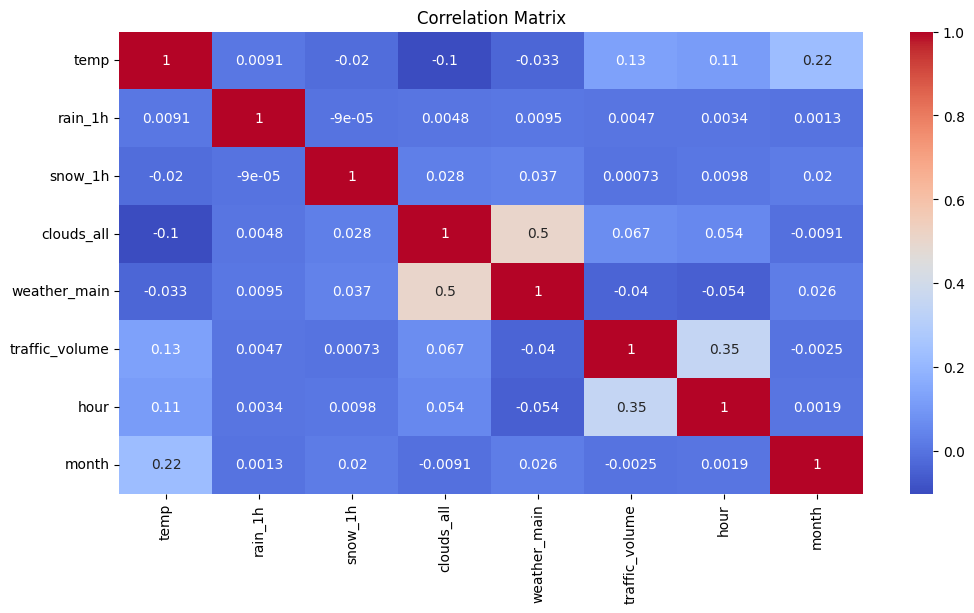

In [7]:
# Remove non-numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

# Correlation Matrix
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### _**5. Predictive Modeling**_
#### Develop Machine Learning Models

In [8]:
# Importing necessary libraries for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# Convert date_time to datetime format
df['date_time'] = pd.to_datetime(df['date_time'])

# Extract hour and day of the week
df['hour'] = df['date_time'].dt.hour
df['day_of_week'] = df['date_time'].dt.dayofweek  # Monday=0, Sunday=6

# Feature Engineering
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
df['is_rush_hour'] = df['hour'].apply(lambda x: 1 if (7 <= x <= 9) or (16 <= x <= 18) else 0)

# Prepare the data with new features
X = df[['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'hour', 'day_of_week', 'month', 'is_weekend', 'is_rush_hour']]
y = df['traffic_volume']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter Tuning for Random Forest using Randomized Search
param_dist_rf = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 8],
    'min_samples_leaf': [1, 2, 3]
}

random_search_rf = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42), param_distributions=param_dist_rf, n_iter=10, cv=3, n_jobs=-1, verbose=2, random_state=42)
random_search_rf.fit(X_train, y_train)

best_rf = random_search_rf.best_estimator_

# Make predictions with the tuned Random Forest
y_pred_rf = best_rf.predict(X_test)

# Evaluate the model
print('Tuned Random Forest Regressor')
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_rf))
print('R-squared:', r2_score(y_test, y_pred_rf))

# Hyperparameter Tuning for Ridge Regression using Randomized Search
from sklearn.linear_model import Ridge

param_dist_lr = {
    'alpha': [0.1, 1.0, 10.0, 100.0]
}

random_search_lr = RandomizedSearchCV(estimator=Ridge(), param_distributions=param_dist_lr, n_iter=10, cv=3, n_jobs=-1, verbose=2, random_state=42)
random_search_lr.fit(X_train, y_train)

best_lr = random_search_lr.best_estimator_

# Make predictions with the tuned Ridge Regression
y_pred_lr = best_lr.predict(X_test)

# Evaluate the model
print('Tuned Ridge Regression')
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_lr))
print('R-squared:', r2_score(y_test, y_pred_lr))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   5.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   5.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   5.9s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   8.1s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   8.1s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   8.2s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=150; total time=   9.0s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=150; total time=   9.0s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   6.4s
[CV] END max_depth=10, min_sam

In [9]:
from sklearn.feature_selection import SelectKBest, f_regression

# Select the best features
selector = SelectKBest(score_func=f_regression, k=8)  # Select top 8 features
selector.fit(X_train, y_train)

# Transform the data with the selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Train a Random Forest with selected features and tuned hyperparameters
best_rf.fit(X_train_selected, y_train)

# Make predictions with the selected features
y_pred_rf_selected = best_rf.predict(X_test_selected)

# Evaluate the model
print('Random Forest with Selected Features')
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_rf_selected))
print('R-squared:', r2_score(y_test, y_pred_rf_selected))

# Train a Ridge Regression with selected features and tuned hyperparameters
best_lr.fit(X_train_selected, y_train)

# Make predictions with the selected features
y_pred_lr_selected = best_lr.predict(X_test_selected)

# Evaluate the model
print('Ridge Regression with Selected Features')
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_lr_selected))
print('R-squared:', r2_score(y_test, y_pred_lr_selected))


Random Forest with Selected Features
Mean Squared Error: 196214.7817664232
R-squared: 0.950369518446268
Ridge Regression with Selected Features
Mean Squared Error: 2508323.264028388
R-squared: 0.3655458046257113


### _**Random Forest with Selected Features**_
##### - Mean Squared Error (MSE): 196214.7817664232
MSE measures the average squared difference between the actual and predicted values. A lower MSE indicates better model performance. In this case, the MSE is relatively low, suggesting that the Random Forest model with selected features performs well in predicting traffic volume.

##### - R-squared (R²): 0.950369518446268
R² represents the proportion of the variance in the dependent variable (traffic volume) that is predictable from the independent variables (features). An R² value close to 1 indicates a high degree of correlation and a good fit. An R² value of 0.95 means that 95% of the variance in traffic volume is explained by the model, indicating strong predictive power.

### _**Ridge Regression with Selected Features**_
##### - Mean Squared Error (MSE): 2508323.264028388
The MSE for the Ridge Regression model is significantly higher compared to the Random Forest model, indicating that the Ridge Regression model is less accurate in its predictions.

##### - R-squared (R²): 0.3655458046257113
The R² value for the Ridge Regression model is much lower (0.37), meaning that only 36.55% of the variance in traffic volume is explained by this model. This indicates a weaker fit and suggests that the Ridge Regression model is not capturing the underlying patterns in the data as well as the Random Forest model.


#### _**Given the performance metrics, the Random Forest model with selected features is the better choice for predicting traffic volume in this case. It provides more accurate and reliable predictions compared to the Ridge Regression model.**_

### **Final Code**

In [10]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('/Users/sujayshah/Desktop/EDA PROJECT/Metro_Interstate_Traffic_Volume.csv')

# Data Preprocessing
df.fillna(method='ffill', inplace=True)
df['date_time'] = pd.to_datetime(df['date_time'])
df['hour'] = df['date_time'].dt.hour
df['day_of_week'] = df['date_time'].dt.dayofweek
df['month'] = df['date_time'].dt.month

# Feature Engineering
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
df['is_rush_hour'] = df['hour'].apply(lambda x: 1 if (7 <= x <= 9) or (16 <= x <= 18) else 0)

# Prepare the data with new features
X = df[['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'hour', 'day_of_week', 'month', 'is_weekend', 'is_rush_hour']]
y = df['traffic_volume']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Selection
selector = SelectKBest(score_func=f_regression, k=8)
selector.fit(X_train, y_train)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Hyperparameter Tuning for Random Forest using Randomized Search
param_dist_rf = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 8],
    'min_samples_leaf': [1, 2, 3]
}

random_search_rf = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42), param_distributions=param_dist_rf, n_iter=10, cv=3, n_jobs=-1, verbose=2, random_state=42)
random_search_rf.fit(X_train_selected, y_train)
best_rf = random_search_rf.best_estimator_

# Make predictions with the tuned Random Forest
y_pred_rf_selected = best_rf.predict(X_test_selected)
print('Random Forest with Selected Features')
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_rf_selected))
print('R-squared:', r2_score(y_test, y_pred_rf_selected))

# Hyperparameter Tuning for Ridge Regression using Randomized Search
param_dist_lr = {
    'alpha': [0.1, 1.0, 10.0, 100.0]
}

random_search_lr = RandomizedSearchCV(estimator=Ridge(), param_distributions=param_dist_lr, n_iter=10, cv=3, n_jobs=-1, verbose=2, random_state=42)
random_search_lr.fit(X_train_selected, y_train)
best_lr = random_search_lr.best_estimator_

# Make predictions with the tuned Ridge Regression
y_pred_lr_selected = best_lr.predict(X_test_selected)
print('Ridge Regression with Selected Features')
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_lr_selected))
print('R-squared:', r2_score(y_test, y_pred_lr_selected))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   7.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   7.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   7.1s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   9.4s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   9.3s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   9.5s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=150; total time=  10.2s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=150; total time=  10.3s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   5.9s
[CV] END max_depth=10, min_sam

### _**6. Solution Development**_
#### Steps
1. Propose Solutions: Based on the analysis, propose solutions such as intelligent traffic management systems and infrastructure improvements.
2. Assess Feasibility: Evaluate the potential impact of these solutions on urban mobility.


### _**Intelligent Traffic Management Systems:**_
Implement adaptive traffic signal systems that adjust the timing based on real-time traffic conditions.
Utilize traffic prediction models to optimize traffic flow and reduce congestion.

### _**Promotion of Public Transportation:**_
Enhance the availability and convenience of public transportation options.
Implement dedicated bus lanes to ensure timely and efficient public transport services.

### _**Infrastructure Improvements:**_
Develop new roads and expand existing ones to accommodate increased traffic.
Implement smart parking solutions to reduce the time spent searching for parking spaces.

### _**Feasibility and Impact Assessment:**_
Conduct cost-benefit analysis for proposed solutions.
Evaluate the environmental and social impacts of implementing these solutions.





---

## Summary and Conclusion

### _Key Findings_
- High traffic volumes are observed during rush hours and weekdays.
- Weather conditions such as rain and snow significantly impact traffic congestion.

### _Proposed Solutions_
- Implement intelligent traffic management systems.
- Promote the use of public transportation.
- Improve infrastructure.

### _Future Work_
- Extend analysis to other urban areas.
- Integrate real-time data for more accurate predictions.
- Explore the impact of seasonal changes on traffic patterns.


---
